## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Connecting drive and importing data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ilab/dataset/pd_speech_features.csv")

In [ ]:
df['class'].value_counts()

,count
class,
1,564
0,192


In [ ]:
df.shape

(756, 755)

In [ ]:
updated_df = df.copy().drop(columns=['id', 'gender', 'class'], axis=1)
updated_df.shape

(756, 752)

## Getting the target variable and important features


In [ ]:
y = df['class']

In [ ]:
X = df[['mean_MFCC_11th_coef', 'tqwt_TKEO_mean_dec_19', 'mean_12th_delta_delta', 'tqwt_entropy_shannon_dec_3', 'locPctJitter',
        'tqwt_TKEO_mean_dec_1', 'IMF_SNR_entropy', 'app_LT_TKEO_std_9_coef', 'tqwt_energy_dec_8', 'tqwt_TKEO_mean_dec_26',
        'tqwt_entropy_shannon_dec_11', 'Ed2_10_coef', 'tqwt_TKEO_mean_dec_36', 'tqwt_energy_dec_19', 'tqwt_TKEO_std_dec_20',
        'tqwt_medianValue_dec_12', 'f4', 'tqwt_skewnessValue_dec_5', 'tqwt_medianValue_dec_10', 'det_TKEO_mean_6_coef', 'det_LT_TKEO_std_7_coef',
        'tqwt_stdValue_dec_3', 'tqwt_medianValue_dec_11', 'det_LT_entropy_log_9_coef', 'GNE_NSR_SEO', 'tqwt_medianValue_dec_22',
        'mean_11th_delta_delta', 'tqwt_stdValue_dec_21', 'tqwt_skewnessValue_dec_8', 'det_LT_entropy_shannon_6_coef', 'tqwt_TKEO_std_dec_26',
        'tqwt_medianValue_dec_35', 'tqwt_medianValue_dec_32', 'tqwt_kurtosisValue_dec_34', 'tqwt_entropy_shannon_dec_2', 'tqwt_skewnessValue_dec_12',
        'app_det_TKEO_mean_3_coef', 'tqwt_minValue_dec_22', 'tqwt_meanValue_dec_31', 'mean_MFCC_6th_coef', 'std_4th_delta', 'tqwt_meanValue_dec_22',
        'tqwt_meanValue_dec_25', 'tqwt_energy_dec_23', 'tqwt_TKEO_std_dec_23', 'tqwt_skewnessValue_dec_30', 'tqwt_entropy_shannon_dec_33',
        'det_TKEO_mean_10_coef', 'mean_MFCC_12th_coef', 'mean_MFCC_8th_coef', 'tqwt_medianValue_dec_26', 'app_LT_TKEO_std_10_coef', 'VFER_std',
        'VFER_NSR_TKEO', 'mean_MFCC_10th_coef', 'tqwt_meanValue_dec_18', 'tqwt_meanValue_dec_16', 'mean_10th_delta', 'tqwt_entropy_shannon_dec_26',
        'mean_delta_delta_0th', 'minIntensity', 'rapJitter', 'b1', 'tqwt_TKEO_std_dec_29', 'tqwt_maxValue_dec_19', 'tqwt_TKEO_std_dec_27',
        'Ed_6_coef', 'tqwt_meanValue_dec_1', 'det_LT_entropy_shannon_9_coef', 'tqwt_entropy_shannon_dec_29', 'mean_4th_delta_delta',
        'tqwt_skewnessValue_dec_20', 'app_LT_TKEO_mean_10_coef', 'tqwt_entropy_shannon_dec_36', 'tqwt_energy_dec_32', 'tqwt_maxValue_dec_21',
        'std_4th_delta_delta', 'tqwt_stdValue_dec_34', 'tqwt_TKEO_std_dec_8', 'tqwt_TKEO_std_dec_11', 'tqwt_skewnessValue_dec_16',
        'Ed_1_coef', 'tqwt_skewnessValue_dec_10', 'tqwt_meanValue_dec_4', 'tqwt_meanValue_dec_5', 'tqwt_meanValue_dec_29', 'tqwt_entropy_shannon_dec_21',
        'tqwt_meanValue_dec_20', 'IMF_NSR_TKEO', 'mean_6th_delta', 'tqwt_entropy_shannon_dec_32', 'det_LT_TKEO_mean_7_coef', 'tqwt_kurtosisValue_dec_17',
        'tqwt_kurtosisValue_dec_30', 'tqwt_maxValue_dec_22', 'mean_delta_delta_log_energy', 'std_MFCC_5th_coef', 'mean_9th_delta_delta',
        'tqwt_stdValue_dec_27', 'tqwt_TKEO_mean_dec_29', 'mean_10th_delta_delta', 'tqwt_TKEO_mean_dec_2', 'tqwt_entropy_shannon_dec_34',
        'tqwt_energy_dec_28', 'tqwt_meanValue_dec_32', 'tqwt_kurtosisValue_dec_27', 'tqwt_medianValue_dec_19', 'tqwt_minValue_dec_31',
        'det_LT_entropy_shannon_4_coef', 'GNE_SNR_TKEO', 'det_LT_entropy_log_10_coef', 'tqwt_medianValue_dec_2', 'tqwt_minValue_dec_29',
        'mean_7th_delta', 'Ed_9_coef', 'tqwt_maxValue_dec_31', 'std_5th_delta_delta', 'tqwt_meanValue_dec_30', 'std_5th_delta', 'tqwt_energy_dec_22',
        'tqwt_entropy_shannon_dec_18', 'tqwt_energy_dec_24', 'mean_1st_delta_delta', 'tqwt_entropy_shannon_dec_4', 'mean_5th_delta_delta',
        'b2', 'tqwt_kurtosisValue_dec_28', 'mean_4th_delta', 'tqwt_skewnessValue_dec_1', 'tqwt_energy_dec_26', 'tqwt_entropy_shannon_dec_23',
        'app_LT_entropy_log_1_coef', 'tqwt_energy_dec_11', 'std_6th_delta_delta', 'Ed2_7_coef', 'IMF_SNR_SEO', 'ddpJitter', 'mean_delta_log_energy',
        'tqwt_meanValue_dec_24', 'app_LT_entropy_log_2_coef', 'tqwt_kurtosisValue_dec_8', 'tqwt_TKEO_std_dec_30', 'tqwt_skewnessValue_dec_34',
        'mean_MFCC_1st_coef', 'b4', 'tqwt_meanValue_dec_19', 'det_TKEO_std_10_coef', 'tqwt_minValue_dec_28', 'tqwt_maxValue_dec_27', 'f3', 'Ea',
        'tqwt_skewnessValue_dec_13', 'det_LT_TKEO_std_6_coef', 'det_TKEO_std_3_coef', 'mean_11th_delta', 'Ed2_2_coef', 'tqwt_skewnessValue_dec_21',
        'tqwt_TKEO_mean_dec_18', 'tqwt_kurtosisValue_dec_29', 'tqwt_entropy_log_dec_26', 'app_LT_entropy_shannon_7_coef', 'tqwt_energy_dec_21',
        'Ed2_3_coef', 'tqwt_kurtosisValue_dec_12', 'tqwt_medianValue_dec_5', 'tqwt_skewnessValue_dec_19', 'tqwt_TKEO_std_dec_34', 'mean_MFCC_9th_coef',
        'mean_12th_delta', 'tqwt_medianValue_dec_30', 'tqwt_stdValue_dec_29', 'tqwt_skewnessValue_dec_9', 'tqwt_meanValue_dec_11',
        'det_TKEO_std_4_coef', 'tqwt_skewnessValue_dec_33', 'mean_2nd_delta_delta', 'det_TKEO_mean_7_coef', 'tqwt_medianValue_dec_8',
        'det_LT_TKEO_mean_2_coef', 'tqwt_skewnessValue_dec_31', 'tqwt_meanValue_dec_6', 'tqwt_skewnessValue_dec_22', 'app_LT_TKEO_mean_1_coef',
        'tqwt_kurtosisValue_dec_14', 'b3', 'tqwt_kurtosisValue_dec_31', 'det_entropy_shannon_4_coef', 'tqwt_medianValue_dec_25',
        'app_LT_entropy_log_4_coef', 'tqwt_kurtosisValue_dec_33', 'tqwt_kurtosisValue_dec_7', 'det_LT_TKEO_mean_10_coef', 'tqwt_meanValue_dec_26',
        'tqwt_skewnessValue_dec_7', 'tqwt_TKEO_std_dec_32', 'tqwt_entropy_shannon_dec_30', 'tqwt_meanValue_dec_35', 'tqwt_TKEO_mean_dec_22',
        'tqwt_meanValue_dec_14', 'tqwt_TKEO_mean_dec_8', 'GNE_std', 'tqwt_medianValue_dec_34', 'GQ_std_cycle_closed', 'tqwt_skewnessValue_dec_25',
        'tqwt_TKEO_std_dec_3', 'ddaShimmer', 'tqwt_skewnessValue_dec_14', 'det_LT_TKEO_std_4_coef', 'tqwt_meanValue_dec_10', 'tqwt_TKEO_std_dec_19',
        'tqwt_entropy_log_dec_25', 'tqwt_kurtosisValue_dec_13', 'tqwt_medianValue_dec_15', 'app_LT_TKEO_mean_9_coef', 'tqwt_skewnessValue_dec_2',
        'tqwt_medianValue_dec_3', 'mean_8th_delta', 'tqwt_medianValue_dec_1', 'tqwt_kurtosisValue_dec_18', 'tqwt_TKEO_mean_dec_34',
        'tqwt_stdValue_dec_31', 'tqwt_kurtosisValue_dec_10', 'tqwt_TKEO_mean_dec_28', 'locDbShimmer', 'mean_3rd_delta',
        'app_LT_entropy_shannon_8_coef', 'tqwt_skewnessValue_dec_32', 'tqwt_meanValue_dec_15', 'tqwt_meanValue_dec_8', 'det_LT_TKEO_std_10_coef',
        'tqwt_skewnessValue_dec_35', 'stdDevPeriodPulses', 'tqwt_meanValue_dec_9', 'tqwt_meanValue_dec_33', 'tqwt_meanValue_dec_34',
        'tqwt_TKEO_std_dec_22', 'tqwt_TKEO_mean_dec_11', 'tqwt_kurtosisValue_dec_19', 'tqwt_skewnessValue_dec_24', 'tqwt_medianValue_dec_24',
        'tqwt_skewnessValue_dec_26', 'tqwt_entropy_shannon_dec_22', 'tqwt_TKEO_mean_dec_21', 'mean_8th_delta_delta', 'tqwt_medianValue_dec_4',
        'app_LT_entropy_shannon_6_coef', 'tqwt_maxValue_dec_8', 'tqwt_skewnessValue_dec_28', 'std_delta_log_energy', 'tqwt_maxValue_dec_28',
        'tqwt_TKEO_std_dec_36', 'tqwt_meanValue_dec_17', 'tqwt_entropy_shannon_dec_25', 'GNE_mean', 'tqwt_stdValue_dec_2',
        'tqwt_medianValue_dec_17', 'locShimmer', 'IMF_SNR_TKEO', 'tqwt_TKEO_std_dec_33', 'tqwt_entropy_log_dec_23', 'tqwt_skewnessValue_dec_18',
        'tqwt_medianValue_dec_18', 'det_LT_entropy_shannon_5_coef', 'tqwt_TKEO_mean_dec_24', 'tqwt_maxValue_dec_36', 'tqwt_TKEO_std_dec_4',
        'tqwt_TKEO_std_dec_2', 'tqwt_medianValue_dec_20', 'tqwt_maxValue_dec_29', 'tqwt_medianValue_dec_9', 'VFER_SNR_TKEO',
        'tqwt_entropy_log_dec_36', 'app_TKEO_std_4_coef', 'tqwt_skewnessValue_dec_11', 'tqwt_stdValue_dec_33', 'det_TKEO_mean_4_coef',
        'tqwt_skewnessValue_dec_29', 'VFER_SNR_SEO', 'tqwt_TKEO_mean_dec_3', 'tqwt_meanValue_dec_2', 'tqwt_minValue_dec_27', 'tqwt_skewnessValue_dec_23',
        'tqwt_TKEO_mean_dec_25', 'tqwt_medianValue_dec_13', 'tqwt_kurtosisValue_dec_15', 'tqwt_meanValue_dec_13', 'tqwt_meanValue_dec_23',
        'tqwt_meanValue_dec_21', 'tqwt_stdValue_dec_28', 'tqwt_minValue_dec_23', 'tqwt_TKEO_std_dec_5', 'det_LT_TKEO_std_2_coef', 'tqwt_meanValue_dec_7',
        'tqwt_skewnessValue_dec_15', 'det_LT_entropy_shannon_7_coef', 'tqwt_minValue_dec_8', 'GQ_prc5_95', 'tqwt_stdValue_dec_23', 'tqwt_meanValue_dec_28',
        'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_26', 'tqwt_minValue_dec_21', 'apq5Shimmer', 'app_LT_entropy_log_3_coef',
        'det_LT_entropy_shannon_10_coef', 'app_LT_TKEO_mean_8_coef', 'tqwt_energy_dec_2', 'tqwt_energy_dec_6', 'tqwt_skewnessValue_dec_6',
        'tqwt_skewnessValue_dec_3', 'det_TKEO_std_7_coef', 'mean_7th_delta_delta', 'mean_3rd_delta_delta', 'Ed2_6_coef', 'tqwt_medianValue_dec_6',
        'det_entropy_shannon_10_coef', 'locAbsJitter', 'tqwt_TKEO_mean_dec_32', 'det_entropy_log_1_coef', 'app_LT_entropy_shannon_5_coef',
        'tqwt_kurtosisValue_dec_20', 'tqwt_entropy_shannon_dec_24', 'tqwt_energy_dec_3', 'Ed_7_coef', 'tqwt_entropy_shannon_dec_1', 'tqwt_energy_dec_18',
        'tqwt_kurtosisValue_dec_16', 'ppq5Jitter', 'apq3Shimmer', 'det_LT_TKEO_std_3_coef', 'mean_1st_delta', 'tqwt_kurtosisValue_dec_21',
        'tqwt_medianValue_dec_23', 'mean_0th_delta', 'tqwt_kurtosisValue_dec_9', 'tqwt_medianValue_dec_27', 'tqwt_skewnessValue_dec_36',
        'tqwt_TKEO_std_dec_24', 'tqwt_stdValue_dec_22', 'tqwt_entropy_shannon_dec_8', 'tqwt_medianValue_dec_33', 'tqwt_medianValue_dec_29',
        'tqwt_energy_dec_31', 'tqwt_entropy_shannon_dec_27', 'std_6th_delta', 'det_entropy_shannon_7_coef', 'tqwt_TKEO_mean_dec_27',
        'tqwt_medianValue_dec_16', 'GNE_NSR_TKEO', 'tqwt_energy_dec_20', 'tqwt_TKEO_mean_dec_23', 'tqwt_minValue_dec_9', 'tqwt_stdValue_dec_19',
        'tqwt_TKEO_mean_dec_33', 'tqwt_skewnessValue_dec_4', 'mean_5th_delta', 'mean_2nd_delta', 'tqwt_entropy_shannon_dec_28', 'std_2nd_delta',
        'tqwt_energy_dec_27', 'tqwt_TKEO_mean_dec_4', 'tqwt_medianValue_dec_7', 'tqwt_kurtosisValue_dec_24', 'Ed2_9_coef', 'tqwt_skewnessValue_dec_17',
        'tqwt_meanValue_dec_3', 'tqwt_stdValue_dec_4', 'tqwt_medianValue_dec_21', 'mean_6th_delta_delta', 'tqwt_kurtosisValue_dec_25',
        'tqwt_skewnessValue_dec_27', 'tqwt_medianValue_dec_31', 'tqwt_kurtosisValue_dec_35', 'tqwt_maxValue_dec_23', 'det_LT_entropy_shannon_3_coef',
        'tqwt_meanValue_dec_27', 'mean_9th_delta', 'GNE_SNR_SEO', 'tqwt_energy_dec_34', 'tqwt_meanValue_dec_12', 'tqwt_medianValue_dec_14',
        'tqwt_minValue_dec_19', 'app_LT_entropy_shannon_10_coef', 'tqwt_medianValue_dec_28', 'tqwt_kurtosisValue_dec_11', 'std_2nd_delta_delta',
        'tqwt_TKEO_mean_dec_30']]

In [ ]:
X.head()

,mean_MFCC_11th_coef,tqwt_TKEO_mean_dec_19,mean_12th_delta_delta,tqwt_entropy_shannon_dec_3,locPctJitter,tqwt_TKEO_mean_dec_1,IMF_SNR_entropy,app_LT_TKEO_std_9_coef,tqwt_energy_dec_8,tqwt_TKEO_mean_dec_26,...,GNE_SNR_SEO,tqwt_energy_dec_34,tqwt_meanValue_dec_12,tqwt_medianValue_dec_14,tqwt_minValue_dec_19,app_LT_entropy_shannon_10_coef,tqwt_medianValue_dec_28,tqwt_kurtosisValue_dec_11,std_2nd_delta_delta,tqwt_TKEO_mean_dec_30
0,-0.006825,0.064414,0.000027,0.091515,0.00218,1.610000e-07,23.2610,4188.2456,0.000376,0.077560,...,1200445.612,0.000002,-2.630000e-21,0.000560,-0.59600,-3601122.613,0.056236,4.6068,0.066410,0.000044
1,0.057552,0.068347,-0.000109,0.122710,0.00195,3.050000e-07,21.8851,4148.9889,0.000276,0.043337,...,1298455.445,0.000003,-3.770000e-20,-0.000146,-0.47909,-3563560.603,0.004587,13.6965,0.077256,0.000081
2,0.286980,0.035857,-0.000298,0.055977,0.00176,1.790000e-07,41.7310,4127.0967,0.000352,0.019365,...,1272869.841,0.000006,2.580000e-21,0.000045,-0.43444,-3539902.400,-0.004803,4.0864,0.068545,0.000072
3,-0.754270,0.033062,-0.000080,2.709800,0.00419,2.580000e-06,35.8179,3910.7029,0.000132,0.432670,...,1932289.206,0.000069,-3.160000e-20,0.000644,-0.52657,-3271399.011,0.000873,100.3649,0.030155,0.018764
4,-0.880070,0.033136,0.000035,3.948500,0.00535,2.440000e-06,31.5211,4297.4639,0.000136,0.498140,...,1861807.802,0.000041,-3.590000e-20,-0.000317,-0.45541,-3367165.736,-0.000449,34.0835,0.030160,0.008679


In [ ]:
X.shape

(756, 387)

## Transforming data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X=scaler.fit_transform(X)

## Splitting dataset into test and train


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=44)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, random_state=44)

The train, validation and test data is split in 80-20 ratio for each as there are 756 records. Since the number of records is enough with 759 features to train the model we use the validation set to test the model performance after training a baseline model.

In [ ]:
print("Training data: ", X_train.shape)
print("Validation data: ", X_val.shape)
print("Test data: ", X_test.shape)

Training data:  (483, 387)
Validation data:  (121, 387)
Test data:  (152, 387)


## Training and testing Random Forest Classifier

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=387, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6804 - loss: 0.6022 - val_accuracy: 0.7851 - val_loss: 0.4922
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8823 - loss: 0.3170 - val_accuracy: 0.8017 - val_loss: 0.4274
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9255 - loss: 0.2308 - val_accuracy: 0.7934 - val_loss: 0.4084
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9601 - loss: 0.1414 - val_accuracy: 0.8099 - val_loss: 0.4392
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9769 - loss: 0.0830 - val_accuracy: 0.8099 - val_loss: 0.5060
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9984 - loss: 0.0476 - val_accuracy: 0.8182 - val_loss: 0.5712
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0305 - val_accuracy: 0.8182 - val_loss: 0.6342
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0156 - val_accuracy: 0.8182 - val_loss

In [ ]:
y_val_pred = model.predict(X_val)
y_val_pred_classes = (y_val_pred > 0.5).astype(int)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Measuring baseline model accuracy and perfomance using Confusion Matrix

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, roc_auc_score, roc_curve, recall_score, precision_score

# Predicting validation data on feature selected data

In [ ]:
val_acc = accuracy_score(y_val, y_val_pred_classes)
val_precision = precision_score(y_val, y_val_pred_classes)
val_roc_auc_score = roc_auc_score(y_val, y_val_pred_classes)
val_recall = recall_score(y_val, y_val_pred_classes)
val_f1 = f1_score(y_val, y_val_pred_classes)
val_roc_curve = roc_curve(y_val, y_val_pred_classes)

In [ ]:
print(f"The test data accuracy is : {np.round(val_acc, 2)}")
print(f"The test data precision is : {np.round(val_precision, 2)}")
print(f"The test data recall is : {np.round(val_recall, 2)}")
print(f"The test data f1-score is : {np.round(val_f1, 2)}")
print(f"The test data ROC curve is : {np.round(val_roc_curve, 2)}")
print(f"The test data ROC-AUC score is : {np.round(val_roc_auc_score, 2)}")

The test data accuracy is : 0.83
The test data precision is : 0.89
The test data recall is : 0.88
The test data f1-score is : 0.88
The test data ROC curve is : [[0.   0.32 1.  ]
 [0.   0.88 1.  ]
 [ inf 1.   0.  ]]
The test data ROC-AUC score is : 0.78


The testing data ROC-AUC score is lower 0.73 which shows the model is not able to differentiate in positive and negative well on new data.

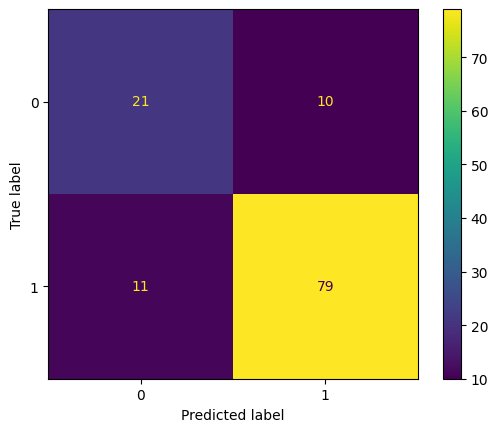

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix_val_dt = confusion_matrix(y_val, y_val_pred_classes)
cm_val_dt = ConfusionMatrixDisplay(confusion_matrix_val_dt)

cm_val_dt.plot()
plt.show()

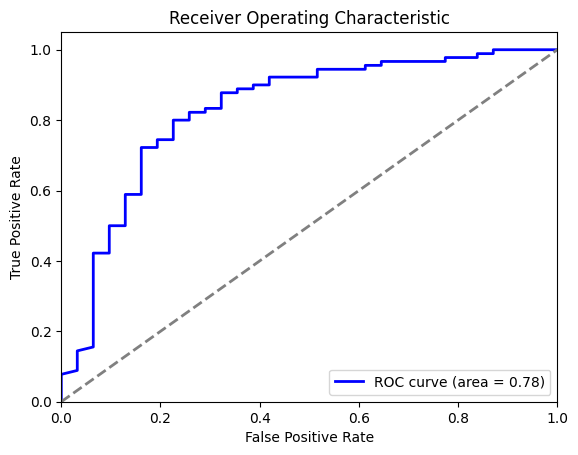

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {val_roc_auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()